# CLEANING AND SAVING DATA INTO MYSQL

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

- The pd.set_option() function.
 
 Is a useful tool for customizing how Pandas displays data in a Jupyter Notebook or console output. By calling this function, you can set options such as the maximum number of rows or columns to display, the precision of floating-point numbers, and more. This function is especially handy when dealing with large datasets, as it allows you to tailor the output to your specific needs. To learn more about the available options and how to use them, you can always turn to the Pandas documentation or use the built-in Python help() function to get more information.

In [2]:
help(pd.set_option)

Help on CallableDynamicDoc in module pandas._config.config:

<pandas._config.config.CallableDynamicDoc object>
    set_option(pat, value)
    
    Sets the value of the specified option.
    
    Available options:
    
    - compute.[use_bottleneck, use_numba, use_numexpr]
    - display.[chop_threshold, colheader_justify, column_space, date_dayfirst,
      date_yearfirst, encoding, expand_frame_repr, float_format]
    - display.html.[border, table_schema, use_mathjax]
    - display.[large_repr]
    - display.latex.[escape, longtable, multicolumn, multicolumn_format, multirow,
      repr]
    - display.[max_categories, max_columns, max_colwidth, max_dir_items,
      max_info_columns, max_info_rows, max_rows, max_seq_items, memory_usage,
      min_rows, multi_sparse, notebook_repr_html, pprint_nest_depth, precision,
      show_dimensions]
    - display.unicode.[ambiguous_as_wide, east_asian_width]
    - display.[width]
    - io.excel.ods.[reader, writer]
    - io.excel.xls.[reader, writ

## IMPORT DATASET

In this project we will use google maps reviews dataset.

In [3]:
#df1=pd.read_csv('google_map_business_data.csv')
df1 = pd.read_csv('google_map_business_data.csv', header=None, names=['company_name', 'rating', 'reviews_count', 'address', 'category', 'phone', 'website'])


In [4]:
def has_digits(row):
    return any(char.isdigit() for char in str(row))

# Applying the function to each row in the specified column
#df1['has_digits'] = df1['name'].apply(has_digits)

#### Define function to get an overview of the data

In [6]:
def data_overview(data, title):
    overview_analysis = {f'{title}':[data.shape[1], data.shape[0], 
                                     data.isnull().any(axis=1).sum(), 
                                     data.isnull().any(axis=1).sum()/len(data)*100,
                                     data.duplicated().sum(),
                                    data.duplicated().sum()/len(data)*100, 
                                     sum((data.dtypes == 'object') & (data.nunique() > 2)),
                                     sum((data.dtypes == 'object') & (data.nunique() < 3)),
                                     data.select_dtypes(include=['int64', 'float64']).shape[1]
                                    ]}
    overview_analysis=pd.DataFrame(overview_analysis, index=['Columns','Rows','Missing_Values','Missing_Values %',
                                                             'Duplicates', 'Duplicates %','Categorical_variables','Boolean_variables','Numerical_variables']).round(2)
    return overview_analysis

data_overview_tab=data_overview(df1, "Data_Overview")

In [7]:
def variables_overview(data):
    variable_details = {
        'unique': data.nunique(),
        'dtype': data.dtypes,
        'null': data.isna().sum(),
        'null %': data.isna().sum() / len(data) * 100,
    }
    variable_details = pd.DataFrame(variable_details)


    # Add a new column 'has_non_alphanumeric' to indicate if there are non-alphanumeric characters
    
    variable_details['has_non_alphanumeric'] = data.apply(lambda col: any(col.apply(lambda x: not str(x).replace(" ", "").isalnum())))
    #variable_details['has_non_alphanumeric'] = data.apply(lambda col: any(col.apply(lambda x: not str(x).isalnum())))

    # Add a new column 'has_digits' to indicate if there are rows containing digits in each column
    variable_details['has_digits'] = data.apply(lambda col: any(col.apply(has_digits)))

    
    return variable_details

In [8]:
variables_overview_data=variables_overview(df1)

In [9]:
variables_overview_data

,unique,dtype,null,null %,has_non_alphanumeric,has_digits
company_name,115,object,0,0.0,True,True
rating,12,float64,0,0.0,True,True
reviews_count,56,int64,0,0.0,False,True
address,86,object,32,25.6,True,True
category,10,object,0,0.0,False,False
phone,116,object,0,0.0,True,True
website,106,object,17,13.6,True,True


In [10]:
data_overview_tab

,Data_Overview
Columns,7.0
Rows,125.0
Missing_Values,42.0
Missing_Values %,33.6
Duplicates,0.0
Duplicates %,0.0
Categorical_variables,5.0
Boolean_variables,0.0
Numerical_variables,2.0


By default, Pandas will only display a subset of the rows in a DataFrame, which can be frustrating when trying to view large datasets. Setting the max_rows option to a higher number, such as 50 or more, allows for more rows and columns to be displayed This can be particularly useful when exploring and analyzing large datasets, as it provides a more complete view of the data without the need for scrolling or paging through multiple displays.

In [98]:
#set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 50)

In [99]:
df1

,company_name,rating,reviews_count,address,category,phone,website
0,D Deep cleaning Services,4.9,62,48a Gill St,House cleaning service,07459 416262,http://ddeepcleaningservices.com/
1,A Star Cleaning Specialists,4.9,61,"Initial Business Centre, Wilson Park, Monsall Rd",Pressure washing service,07470 669502,http://www.astarcleaningspecialists.co.uk/
2,TER Cleaning Services,4.8,21,M9,House cleaning service,07961 917419,http://tercleaningservices.co.uk/
3,Cleaners With Pride,4.9,317,23 Pattishall Cl,House cleaning service,07840 017649,https://www.cleanerswithpride.co.uk/
4,⭐ Manchester House Cleaning Services,4.9,126,61 Mosley St,House cleaning service,0161 676 2888,https://www.manchesterhousecleaningservices.co...
5,Supreme cleaners,5.0,10,NaN,Cleaning service,07930 111407,http://supreme-cleaners.co.uk/
6,FirstMaid Cleaners | Manchester,4.2,165,83 Ducie St,House cleaning service,0800 061 4030,https://firstmaid.co.uk/
7,The Professional Cleaning Co,4.8,51,1 Quay St,House cleaning service,0161 307 3373,http://www.theprofessionalcleaningcompany.co.uk/
8,Wizz Cleaning Service,5.0,8,NaN,Cleaners,Closed ⋅ Opens 9 am Thu,https://www.facebook.com/Wizz-Cleaning-Service...
9,Olico,5.0,190,"11th floor, 3 Piccadilly Pl",Commercial cleaning service,0330 133 1094,http://www.olico.co.uk/


### COLUMN CLEANING FOR MYSQL DATABASE

In [11]:
#standardize(lowercas) column names and make them consistent
df1.columns = map(str.lower, df1.columns)

In [12]:
# replace non-alphanumeric characters with underscore
df1.columns = df1.columns.str.replace('[^0-9a-zA-Z]+', '_')

C:\Users\d\AppData\Local\Temp\ipykernel_3616\1574386280.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.columns = df1.columns.str.replace('[^0-9a-zA-Z]+', '_')


In [13]:
#remove leading underscores ('_') from the column names
#data.columns = data.columns.str.lstrip('_')

In [14]:
# remove digits from column names
#df.columns = df.columns.str.replace('\d+', '')

### MISSING VALUES

In [15]:
#select categorical variables to a list
cat_var = variables_overview_data.loc[(variables_overview_data["dtype"] == "object")]
cat_var_list = cat_var.index.to_list()

In [16]:
cat_var_list

['company_name', 'address', 'category', 'phone', 'website']

In [17]:
cat_var_count_df = pd.DataFrame(columns=['Variable', 'Category', 'Count', 'Count%'])

for i in cat_var_list:
    value_counts = df1[i].value_counts()
    n_obs = df1.shape[0]
    cat_var_count_df = cat_var_count_df.append(
        pd.DataFrame({
            'Variable': i,
            'Category': value_counts.index,
            'Count': value_counts.values,
            'Count%': value_counts.values / n_obs * 100
        }),
        ignore_index=True
    )

cat_var_count_df = cat_var_count_df.sort_values(['Variable', 'Category']).reset_index(drop=True)
cat_var_count_df

C:\Users\d\AppData\Local\Temp\ipykernel_3616\461999402.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_var_count_df = cat_var_count_df.append(
C:\Users\d\AppData\Local\Temp\ipykernel_3616\461999402.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_var_count_df = cat_var_count_df.append(
C:\Users\d\AppData\Local\Temp\ipykernel_3616\461999402.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_var_count_df = cat_var_count_df.append(
C:\Users\d\AppData\Local\Temp\ipykernel_3616\461999402.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_var_count_df = cat_var_count_df.append(
C:\Users\d\AppData\Local\Temp\ipykernel_

,Variable,Category,Count,Count%
0,address,1 Campbell Rd,1,0.8
1,address,1 Quay St,1,0.8
2,address,1-6 Bryson Walk,1,0.8
3,address,10 Isis Cl,1,0.8
4,address,11 Causey Dr,1,0.8
...,...,...,...,...
428,website,https://www.mbfcleaning.co.uk/,1,0.8
429,website,https://www.minstercleaning.co.uk/uk/mancheste...,1,0.8
430,website,https://www.pkcleaning.com/window-cleaning-swi...,1,0.8
431,website,https://www.responsebioclean.com/,1,0.8


In [18]:
#Categorical Variables with missing values
cat_miss_values = variables_overview_data.loc[(variables_overview_data["dtype"] == "object") & (variables_overview_data["null"] > 0)]
cat_miss_values

,unique,dtype,null,null %,has_non_alphanumeric,has_digits
address,86,object,32,25.6,True,True
website,106,object,17,13.6,True,True


In [19]:
#Numerical Variables with missing values

num_miss_values = variables_overview_data.loc[~(variables_overview_data["dtype"] == "object") & (variables_overview_data["null"] > 0)]
num_miss_values

,unique,dtype,null,null %,has_non_alphanumeric,has_digits


In [22]:
df1_mysql = df1.where(pd.notna(df1), 'None')


In [25]:
# Specify the path where you want to save the CSV file
csv_path = r'C:\Users\d\django\market\cleaned.csv'


# Save the DataFrame to a CSV file
df1_mysql.to_csv(csv_path, index=False)

In [23]:
df1_mysql

,company_name,rating,reviews_count,address,category,phone,website
0,D Deep cleaning Services,4.9,62,48a Gill St,House cleaning service,07459 416262,http://ddeepcleaningservices.com/
1,A Star Cleaning Specialists,4.9,61,"Initial Business Centre, Wilson Park, Monsall Rd",Pressure washing service,07470 669502,http://www.astarcleaningspecialists.co.uk/
2,TER Cleaning Services,4.8,21,M9,House cleaning service,07961 917419,http://tercleaningservices.co.uk/
3,Cleaners With Pride,4.9,317,23 Pattishall Cl,House cleaning service,07840 017649,https://www.cleanerswithpride.co.uk/
4,⭐ Manchester House Cleaning Services,4.9,126,61 Mosley St,House cleaning service,0161 676 2888,https://www.manchesterhousecleaningservices.co...
...,...,...,...,...,...,...,...
120,Star Gutter Cleaning,5.0,27,15 Brunswick Rd,Gutter Cleaning Service,07940 356876,http://www.stargutter.co.uk/
121,Cook Carpet Cleaning Heros,5.0,7,1 Campbell Rd,Carpet cleaning service,07830 352611,https://cookcarpetcleaningheros.co.uk/
122,Time For You Domestic Cleaning South Manchester,5.0,8,None,House cleaning service,0161 413 5639,https://timeforyou.cleaning/uk/home-cleaning/s...
123,Minster Cleaning Services Manchester,5.0,4,2-6 Rochdale Rd,Commercial cleaning service,0161 643 1792,https://www.minstercleaning.co.uk/uk/mancheste...


### SAVE DATA INTO MYSQL

In [7]:
import mysql.connector


In [8]:
mydb = mysql.connector.connect(
  host="localhost",
  port="3306",
  user="root",
  password="uksg2021A1.")

In [9]:
mycursor = mydb.cursor()

In [10]:
#mycursor.execute("CREATE DATABASE IF NOT EXISTS maps_files")


In [11]:
mycursor.execute("USE maps_files")

In [106]:
table_name = 'scrapped_data'

create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} (id INT AUTO_INCREMENT PRIMARY KEY, {', '.join([f'{col} VARCHAR(255)' for col in df1_mysql.columns])});"
mycursor.execute(create_table_query)
mydb.commit()

In [71]:
alter_statement= f"ALTER TABLE {table_name} MODIFY website VARCHAR(500)"
# Execute the ALTER TABLE statement
mycursor.execute(alter_statement)

# Commit the changes
mydb.commit()

In [72]:
# append data to existing table
for i, row in df1_mysql.iterrows():
    columns = list(row.index)
    values = tuple(row)
    sql = f"INSERT INTO {table_name} ({','.join(columns)}) VALUES ({','.join(['%s']*len(columns))})"
    mycursor = mydb.cursor()
    mycursor.execute(sql, values)
    mydb.commit()
    mycursor.fetchall()  # add this line to consume the result set

In [12]:
# Create a cursor object to interact with the database
# Retrieve all unique values from the 'scrapped_data' column
mycursor.execute("USE maps_files")
mycursor.execute("SELECT DISTINCT company_name FROM scrapped_data;")
distinct_values = mycursor.fetchall()

# Create an empty DataFrame
result_df = pd.DataFrame(columns=['company_name', 'registered'])

# Iterate through each distinct value and check if it exists in 'company_house'
for value in distinct_values:
    value = value[0]  # Extract the value from the tuple
    # Close the previous result set
    #mycursor.fetchall()
    
    mycursor.execute("USE company_files")
    
    # Use a parameterized query to handle special characters
    query = "SELECT * FROM company_house WHERE companyname = %s;"
    
    # Execute the query with the value as a parameter
    mycursor.execute(query, (value,))
    
    # Fetch the result
    result = mycursor.fetchall()
    
    # Check if there is a match
    if result:

        print(f"Value '{value}' found in company_house.")
    else:
        print(f"Value '{value}' not found in company_house.")
        result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)

    
    # Check if there is a match and append to the DataFrame
    #result_df = result_df.append({'company_name': value, 'registered': 'yes' if result else 'no'}, ignore_index=True)

# Close the cursor and the database connection
mycursor.close()
mydb.close()

# Display the resulting DataFrame
#print(result_df)



Value 'RINSE'n'SHINE' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Accy Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Deep Cleaning solutions' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Jay's Carpet Cleaning Blackburn' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'domestic Cleaning service & Gardening' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Heros CarpetClean Blackburn' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Mr Carpet Cleaner' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Detail Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'WOW Carpet Cleaners Blackburn' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'ServiceClean East lancs' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Primo Cleaning Services Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Safe Hands Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Hyndburn Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Enviro Clean Darwen' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Clarky Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Mr Sparkles carpet & upholstery cleaning services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Allforone & Oneforall' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'D DEEP CLEANING SERVICES LANCASHIRE' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Pendle Carpet Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Clean & Fresh Carpets' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Superclean of Pendle' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'S and S Carpet & Upholstery Cleaning Bolton' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Crompton's Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'S T B Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Sutcliffes carpet cleaning of Bolton & Leather Care' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Heros Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'DAB Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Carpet Solutions' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Express City Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Walton Cleaning Company' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'The Carpet Doctor North West' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Super Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'SparkLee Carpets' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Soapranos Cleaning Services LTD' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Paul Anderson Carpet and Upholstery Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Blackburn CarpetClean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'The Magic Carpet Cleaning Guy Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Doctor Carpet Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'The Carpet Man Wigan Ltd professional deep cleaning carpet technician' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Back2New Carpet & Upholstery Cleaners' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Easy Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Elite Kleen Mcr' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Fresh Fibres Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Bolton Carpet Cleaners' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Husky Carpet and upholstery cleaning services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Unreal Cleaning Solutions' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'MS Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Limelight Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Complete Oven and Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Super Carpet Cleaning Service' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Horwich carpet cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Deep Clean Carpet & Upholstery Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Lymm Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Premier carpet Care' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Complete Care Carpets and Upholstery' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Burnley Carpet Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Davidson's Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Oven Cura (Oven & Carpet Cleaning)' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Absolute Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Great Scents Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Fresh Start Carpet Cleaning Lancashire' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Harrop's Helping Hands' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Germ Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Homeclean Of Pendle' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'No Better Cleaning Services Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'M&N Carpet Cleaning Halifax' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Carpetmonsters-carpet-cleaning-services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Deepclean Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Extreme Cleaning NW' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Steam4clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Complete Carpet Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Simply Carpet Clean Chorley' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Baron Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'CleanPlus carpet cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Heros Carpet Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)
C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'North Carpet Cleaning' not found in company_house.
Value 'Carpet Magic North West' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Super Carpet Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'The Happy Carpet Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Complete Carpet Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Gemini Commercial Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Lords Of Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Rug Cleaning Experts' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'JP Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Always Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Carpet & Upholstery Cleaning (9-1-Gone)' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Super Carpet Cleaners' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Jackson Carpet & Upholstery Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Minster Cleaning Services Lancashire' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'D Higham' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'React Fast Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Cleaning Doctor Carpet & Upholstery Services East Lancashire' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'D Deep cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'A Star Cleaning Specialists' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'TER Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Cleaners With Pride' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value '⭐ Manchester House Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Supreme cleaners' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'FirstMaid Cleaners | Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'The Professional Cleaning Co' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Wizz Cleaning Service' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Olico' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Rafiki Cleaning Services Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Homeclean Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Cloud Cleaners' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Mr Hygenic ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'VA Clean Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Halo’s Housekeeping' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Serene Clean Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Pure & Sure' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Pink Ladies Cleaning Services - MANCHESTER' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'White Regal Limited' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Servos Exterior Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value '"Lemon Breeze"' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'US Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Super House Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Bright & Beautiful Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'AJOL Cleaning Services Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Jimklean Services Limited' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Bettersparkle Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Vclear Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Merry Maids' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'BrightWhite UPVC Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Superious Cleaning Co' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'AMB Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Bex Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Archer Window Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Exclusive Professional Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'jpe cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'PK Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Sparkleenhomes' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Simone's Housekeeping & Cleaning Service' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Class Cleaning Services Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Ratcliffe Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Kingsmaid Home & Office Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Pro-cleaners Manchester G' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value '3N Cleaners' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'dusters.cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Quest Clean Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Mama’s Cleaning Service' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Merco' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Robust cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Maid2Clean Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Adept Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Premier PVC Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Manchester window cleaners Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'M & M Office Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Keeping Manchester Clean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Clever Services Ltd' found in company_house.
Value 'Harrison Cleaning Specialists Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'FRIDOS OLDHAM CLEANING SERVICE' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Right Choice Carpet cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Donks Cleaning, Domestic, Retail and Commercial Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Sentrex Services UK Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Best Clean Direct' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Bury Carpet Care' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Power Wash UK (NW) Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'HCS Cleaning Services Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Well Kept (Limited) - Commercial Cleaning Supplies Oldham (wholesaler)' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'PM 247 Cleaning ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Poppies Cleaning Service' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Diamond Home Support Rochdale' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'The Big Orange Cleaning Company' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'BH Professional Oven Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Glamour House Cleaning Company' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Evans cleaning services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Response Bioclean Specialist cleaning 24/7' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Happy House Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Fluff Cleaning Services Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Cleaning Eagles' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Cleaning Please' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Magnate Resources Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Ametros Facilities Management Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Q Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Iclean NW' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Maid 4 U LTD' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'The Cleaning Company' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Extra Mile Cleaners Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Sparkle 4 U Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'BriteGroup - Commercial Cleaning In Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Maid to gleam' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'ECO-Cleaners' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Genie Cleans' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Access Cleaning Specialists Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Prestige Carpet Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'MBF Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Cleaning Services Denton' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Re-Sparkle Cleaning Service' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'rj external cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'J Barlow Servicing Ltd' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'UKWindowClean' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Hello Services Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'St Helens Cleaning Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Gemini Window Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'AJ Cleaning Services Window Commercial & Domestic Cleaning - Middleton - Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'MBH Services' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Star Gutter Cleaning' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Cook Carpet Cleaning Heros' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Time For You Domestic Cleaning South Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'Minster Cleaning Services Manchester' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


Value 'JAYCLOTH CLEANING SERVICES' not found in company_house.


C:\Users\d\AppData\Local\Temp\ipykernel_4964\2987163124.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'company_name': value, 'registered': 'no'}, ignore_index=True)


In [13]:
result_df

,company_name,registered
0,RINSE'n'SHINE,no
1,Accy Carpet Cleaning,no
2,Deep Cleaning solutions,no
3,Jay's Carpet Cleaning Blackburn,no
4,domestic Cleaning service & Gardening,no
...,...,...
195,Star Gutter Cleaning,no
196,Cook Carpet Cleaning Heros,no
197,Time For You Domestic Cleaning South Manchester,no
198,Minster Cleaning Services Manchester,no


In [149]:
mycursor.execute("USE maps_files")

select_statement = """SELECT * FROM maps_files.scrapped_data;
"""

In [150]:
mycursor.fetchall()

[]

In [174]:
clean_data = pd.read_sql(select_statement, mydb)

C:\Users\d\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [175]:
# Replace 'None' values in 'rating' column with a default value
clean_data['rating'] = clean_data['rating'].replace('None', 0.0)
clean_data['rating'] = pd.to_numeric(clean_data['rating'], errors='coerce')  # Convert to numeric, coerce errors to NaN
clean_data['reviews_count'] = pd.to_numeric(clean_data['reviews_count'], errors='coerce')  # Convert to numeric, coerce errors to NaN


In [176]:
clean_data

,id,company_name,rating,reviews_count,address,category,phone,website
0,1,RINSE'n'SHINE,5.0,69.0,15 Meadoway,Carpet cleaning service,07514 714579,https://www.rinsenshine.co.uk/
1,2,Accy Carpet Cleaning,5.0,2.0,47 Union Rd,Carpet cleaning service,01254 403175,https://www.accycarpetcleaning.co.uk/
2,3,Deep Cleaning solutions,5.0,9.0,28 Cranbourne Dr,Carpet cleaning service,01254 403101,None
3,4,Jay's Carpet Cleaning Blackburn,5.0,24.0,23 Didsbury St,Carpet cleaning service,07540 246307,http://www.jayscarpetcleaningblackburn.weebly....
4,5,domestic Cleaning service & Gardening,4.4,9.0,None,Carpet cleaning service,07342 315519,http://www.rsncleanltd.com/
5,6,Heros CarpetClean Blackburn,4.7,26.0,11 St Marys Wharfe,Carpet cleaning service,01254 403970,https://www.heroscarpetcleanblackburn.co.uk/
6,7,Mr Carpet Cleaner,4.9,209.0,12 Strawberry Bank,Carpet cleaning service,07850 484251,http://www.mr-carpetcleaner.co.uk/
7,8,Detail Carpet Cleaning,5.0,16.0,None,Carpet cleaning service,07403 555774,https://www.facebook.com/Detail-Carpet-Cleanin...
8,9,WOW Carpet Cleaners Blackburn,4.8,30.0,40 Abraham St,Carpet cleaning service,01254 403195,None
9,10,ServiceClean East lancs,0.0,NaN,23 Park Ln,Carpet cleaning service,01254 872557,None


In [177]:
# Check for duplicates across all columns
#duplicates_all_columns = clean_data['company_name'].duplicated()
duplicates_all_columns=clean_data.company_name[clean_data['company_name'].duplicated()]


In [178]:
duplicates_all_columns

111                      D Deep cleaning Services
112                   A Star Cleaning Specialists
113                         TER Cleaning Services
114                           Cleaners With Pride
115          ⭐ Manchester House Cleaning Services
116                              Supreme cleaners
117               FirstMaid Cleaners | Manchester
118                  The Professional Cleaning Co
119                         Wizz Cleaning Service
120                                         Olico
121                  Rafiki Cleaning Services Ltd
122                          Homeclean Manchester
123                                Cloud Cleaners
124                                Mr Hygenic ltd
125                                  VA Clean Ltd
126                           Halo’s Housekeeping
127                       Serene Clean Manchester
128                                   Pure & Sure
129    Pink Ladies Cleaning Services - MANCHESTER
140                                Cloud Cleaners


In [188]:
#clean_data_filtered = clean_data[~clean_data['company_name'].isin(duplicates_all_columns)]
clean_data_filtered = clean_data.drop_duplicates('company_name', keep='first')



In [189]:
clean_data_filtered

,id,company_name,rating,reviews_count,address,category,phone,website
0,1,RINSE'n'SHINE,5.0,69.0,15 Meadoway,Carpet cleaning service,07514 714579,https://www.rinsenshine.co.uk/
1,2,Accy Carpet Cleaning,5.0,2.0,47 Union Rd,Carpet cleaning service,01254 403175,https://www.accycarpetcleaning.co.uk/
2,3,Deep Cleaning solutions,5.0,9.0,28 Cranbourne Dr,Carpet cleaning service,01254 403101,None
3,4,Jay's Carpet Cleaning Blackburn,5.0,24.0,23 Didsbury St,Carpet cleaning service,07540 246307,http://www.jayscarpetcleaningblackburn.weebly....
4,5,domestic Cleaning service & Gardening,4.4,9.0,None,Carpet cleaning service,07342 315519,http://www.rsncleanltd.com/
5,6,Heros CarpetClean Blackburn,4.7,26.0,11 St Marys Wharfe,Carpet cleaning service,01254 403970,https://www.heroscarpetcleanblackburn.co.uk/
6,7,Mr Carpet Cleaner,4.9,209.0,12 Strawberry Bank,Carpet cleaning service,07850 484251,http://www.mr-carpetcleaner.co.uk/
7,8,Detail Carpet Cleaning,5.0,16.0,None,Carpet cleaning service,07403 555774,https://www.facebook.com/Detail-Carpet-Cleanin...
8,9,WOW Carpet Cleaners Blackburn,4.8,30.0,40 Abraham St,Carpet cleaning service,01254 403195,None
9,10,ServiceClean East lancs,0.0,NaN,23 Park Ln,Carpet cleaning service,01254 872557,None


In [200]:
result_df


,company_name,registered
0,RINSE'n'SHINE,no
1,Accy Carpet Cleaning,no
2,Deep Cleaning solutions,no
3,Jay's Carpet Cleaning Blackburn,no
4,domestic Cleaning service & Gardening,no
5,Heros CarpetClean Blackburn,no
6,Mr Carpet Cleaner,no
7,Detail Carpet Cleaning,no
8,WOW Carpet Cleaners Blackburn,no
9,ServiceClean East lancs,no


In [198]:
# Drop columns from the DataFrame
columns_to_drop = ['address', 'category','phone', 'website']
clean_data_filtered = clean_data_filtered.drop(columns=columns_to_drop)

In [201]:
# Merge the DataFrames on 'company_name'
merged_data = pd.merge(clean_data_filtered, result_df, on='company_name', how='left')

In [203]:
variables_overview(merged_data)

,unique,dtype,null,null %,has_non_alphanumeric,has_digits
id,201,int64,0,0.000000,False,True
company_name,201,object,0,0.000000,True,True
rating,13,float64,0,0.000000,True,True
reviews_count,79,float64,3,1.492537,True,True
registered,1,object,1,0.497512,False,False


In [219]:
merged_data

,id,company_name,rating,reviews_count,registered
0,1,RINSE'n'SHINE,5.0,69.0,no
1,2,Accy Carpet Cleaning,5.0,2.0,no
2,3,Deep Cleaning solutions,5.0,9.0,no
3,4,Jay's Carpet Cleaning Blackburn,5.0,24.0,no
4,5,domestic Cleaning service & Gardening,4.4,9.0,no
5,6,Heros CarpetClean Blackburn,4.7,26.0,no
6,7,Mr Carpet Cleaner,4.9,209.0,no
7,8,Detail Carpet Cleaning,5.0,16.0,no
8,9,WOW Carpet Cleaners Blackburn,4.8,30.0,no
9,10,ServiceClean East lancs,0.0,NaN,no


In [204]:
table_name = 'clean_data'

#create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} (id INT AUTO_INCREMENT PRIMARY KEY, {', '.join([f'{col} VARCHAR(255)' for col in df1_mysql.columns])});"


In [213]:
create_table_query = f"CREATE TABLE {table_name} (id INT AUTO_INCREMENT PRIMARY KEY, company_name VARCHAR(255), rating FLOAT, reviews_count FLOAT, registered TEXT);"


In [214]:
mycursor.execute(create_table_query)
mydb.commit()

In [240]:
merged_data['rating'] = merged_data['rating'].replace('Nan', 0.0)
merged_data['rating'] = pd.to_numeric(merged_data['rating'], errors='coerce')  # Convert to numeric, coerce errors to NaN

merged_data['reviews_count'] = merged_data['reviews_count'].fillna(0.0)
merged_data['registered'] = merged_data['registered'].fillna('no')


merged_data['reviews_count'] = pd.to_numeric(merged_data['reviews_count'], errors='coerce')

In [232]:
merged_data.drop('id', axis=1, inplace=True)


In [241]:
merged_data

,company_name,rating,reviews_count,registered
0,RINSE'n'SHINE,5.0,69.0,no
1,Accy Carpet Cleaning,5.0,2.0,no
2,Deep Cleaning solutions,5.0,9.0,no
3,Jay's Carpet Cleaning Blackburn,5.0,24.0,no
4,domestic Cleaning service & Gardening,4.4,9.0,no
5,Heros CarpetClean Blackburn,4.7,26.0,no
6,Mr Carpet Cleaner,4.9,209.0,no
7,Detail Carpet Cleaning,5.0,16.0,no
8,WOW Carpet Cleaners Blackburn,4.8,30.0,no
9,ServiceClean East lancs,0.0,0.0,no


In [242]:
# append data to existing table
for i, row in merged_data.iterrows():
    columns = list(row.index)
    values = tuple(row)
    sql = f"INSERT INTO {table_name} ({','.join(columns)}) VALUES ({','.join(['%s']*len(columns))})"
    mycursor = mydb.cursor()
    mycursor.execute(sql, values)
    mydb.commit()
    mycursor.fetchall()  # add this line to consume the result set

C:\Users\d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


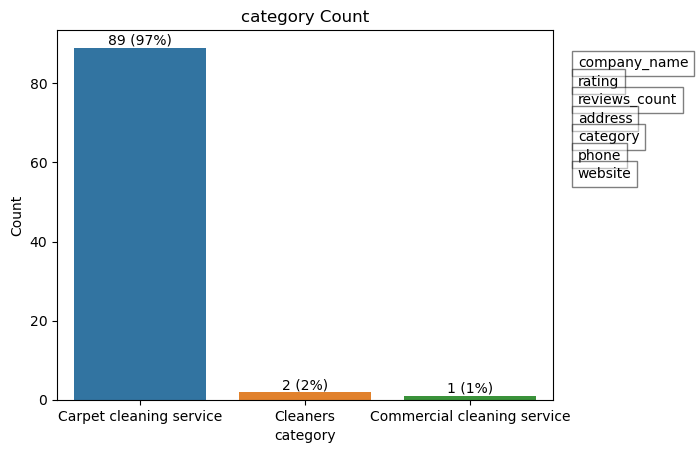

In [132]:
ax = sns.countplot(df1["category"], 
                   order = df1["category"].value_counts().index)
abs_values = df1['category'].value_counts().values
rel_values = df1['category'].value_counts(normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_xlabel('category')
ax.set_ylabel('Count')
ax.set_title('category Count')
# Add label box

# Add label box for each column
for i, column in enumerate(df1.columns):
    plt.text(1.05, 0.9 - 0.05 * i, f'{column}', bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)

# Show the plot
plt.show()

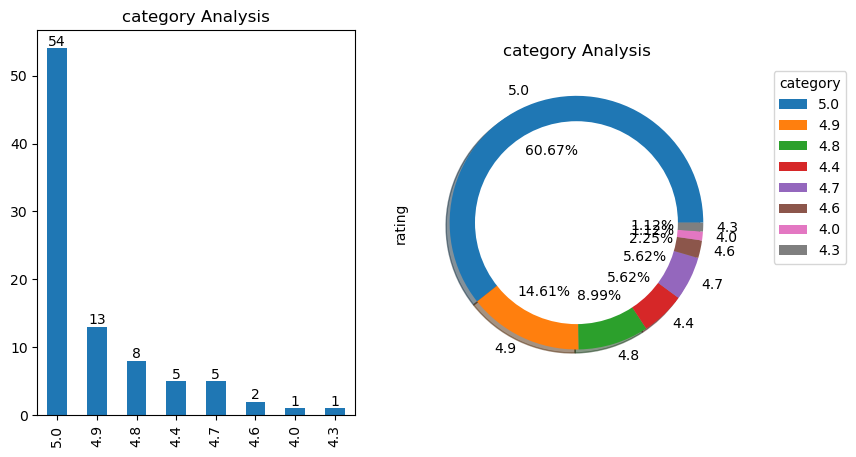

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
df1["rating"].value_counts().plot.bar( ax=ax[0])
df1["rating"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True, ax=ax[1])
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax[1].set_title("category Analysis")
ax[0].set_title("category Analysis")
ax[1].legend(title="category", bbox_to_anchor=(1.1, 1))
for i, patch in enumerate(ax[0].patches):
    count = df1["rating"].value_counts().iloc[i]
    ax[0].annotate(str(count), xy=(patch.get_x() + patch.get_width() / 2, patch.get_height() + 1), 
                ha='center', va='center', fontsize=10)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

In [118]:
# Group by 'category' and calculate the mean of 'rating' and 'reviews_count'
mode_table = df1.groupby('category')[['rating', 'reviews_count']].agg(pd.Series.mean)

# Sort by 'rating' in descending order
mode_table = mode_table.sort_values(by='rating', ascending=False)
mode_table

,rating,reviews_count
category,,
Cleaning products supplier,5.000000,27.000000
Pressure washing service,4.966667,52.666667
Carpet cleaning service,4.954545,106.000000
Window cleaning service,4.950000,39.833333
Drainage service,4.900000,73.000000
Commercial cleaning service,4.811538,23.500000
Cleaning service,4.760000,20.200000
Cleaners,4.716667,11.916667
House cleaning service,4.713462,42.461538


## USING df.head() to increase rows to display

At times, when using pd.options.display to specify the maximum number of rows to display in a dataset, the default pandas value for rows may still be displayed. To ensure the correct number of rows are displayed, we can use the df.head(50) method where we specify the same exact number for rows to be displayed.

In this project we will use Tesla  stock data. Using Python and its various libraries, we can collect and analyze stock data effectively. One such library that simplifies the process is 'yfinance'.  The create a function called 'stockdata', which downloads the stock data of a given symbol, sets a time period for collecting stock data from 2018 to 2022.  and converts it into a Pandas DataFrame. In this example, the symbol 'TSLA' is used, and the resulting DataFrame is stored in the 'df' variable. 

In [24]:
import yfinance as yf
import datetime as dt

In [25]:
def stockdata(symbol):
    _start = dt.date(2018,1,1)
    _end = dt.date(2022,12,25)
    ticker = symbol
    df = yf.download(ticker, start = _start, end = _end) 
    df = pd.DataFrame.from_dict(df)
    stockdata=df
    
    return stockdata

In [26]:
df=stockdata('TSLA')
df.head(50)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
2018-01-09,22.344000,22.586666,21.826668,22.246000,22.246000,107199000
2018-01-10,22.146667,22.466667,22.000000,22.320000,22.320000,64648500
2018-01-11,22.349333,22.987333,22.217333,22.530001,22.530001,99682500
2018-01-12,22.575333,22.694000,22.244667,22.414667,22.414667,72376500


In [29]:
#set the maximum number of rows to display
pd.set_option('display.max_rows', 100)

In [30]:
df.head(100)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
2018-01-09,22.344000,22.586666,21.826668,22.246000,22.246000,107199000
2018-01-10,22.146667,22.466667,22.000000,22.320000,22.320000,64648500
2018-01-11,22.349333,22.987333,22.217333,22.530001,22.530001,99682500
2018-01-12,22.575333,22.694000,22.244667,22.414667,22.414667,72376500
